In [2]:
import time
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection

%matplotlib inline

In [4]:
from src.data import Data
from src.plothelp import * 
import src.data_set_image_manip

In [7]:
data = Data("img")
data.load_pickle("100x100.pickle")
X_train, X_test, y_train, y_test = data.train_test_split()

(4698, 100, 100, 3)


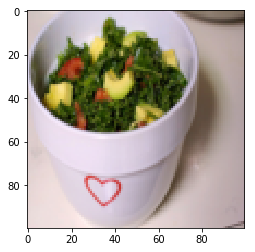

In [9]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
print(X_train.shape)
plt.imshow(X_train[398].astype('uint8'))# plot image from the dataset to see how it looks


X_trains = np.reshape(X_train, (X_train.shape[0], -1)) #flatten the image
X_tests = np.reshape(X_test, (X_test.shape[0], -1)) #

In [12]:
from sklearn.decomposition import PCA

n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_trains)

X_train_pca = pca.transform(X_trains)
X_test_pca = pca.transform(X_tests)

In [ ]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

end = time.time()
elapsed = end - start
print("Classifier train in ", elapsed, "seconds")

In [ ]:
y=logreg.predict(X_test_pca)
print("Test Data accuracy  score", accuracy_score(y, y_test)*100,"%")